In [53]:
#Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [54]:
base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv",index_col = "date")
#creeer une nouvelle colonne pour predire contenant la prediction de s'il va neiger et pleuvoir.
base_donnees["It's raining"] = base_donnees["rain"]>0
base_donnees["It's snowing"] = base_donnees["snow"]>0
del base_donnees["sunset_hhmm"]
del base_donnees["sunrise_hhmm"]
base_donnees = base_donnees.iloc[::-1]
base_donnees


C:\Users\test8\AppData\Local\Temp\ipykernel_19268\3418793079.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  base_donnees = pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv",index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10,It's raining,It's snowing
date,,,,,,,,,,,,,,,,,,,,,
1969-12-30,-7.2,-12.03,-13.05,-18.9,NaN,-23.0,99,79.2,85.0,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1969-12-31,-13.3,-16.22,-16.95,-20.6,NaN,-25.0,78,64.5,64.0,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1970-01-01,-13.9,-17.65,-18.35,-22.8,NaN,-29.0,59,52.2,53.0,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1970-01-02,-11.7,-14.84,-14.75,-17.8,NaN,-28.0,59,55.4,54.5,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1970-01-03,-10.0,-18.01,-16.95,-23.9,NaN,-28.0,76,61.0,59.5,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,1.4,-1.72,-1.70,-4.8,NaN,-8.0,95,86.9,84.0,73,...,8.0,6.7,4.0,0.0,NaN,NaN,NaN,NaN,False,True
2025-02-28,1.5,-6.61,-4.15,-9.8,NaN,-18.0,92,64.2,67.5,43,...,8.0,6.1,5.0,2.0,NaN,NaN,NaN,NaN,False,True
2025-03-01,0.0,-7.04,-6.90,-13.8,NaN,-23.0,89,80.9,79.5,70,...,8.0,7.2,6.0,4.0,NaN,NaN,NaN,NaN,False,True


In [55]:
#Voir les pourcentages de manque de donnes dans chaque colonnes
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747383
                               ...   
avg_hourly_cloud_cover_10    0.994145
avg_cloud_cover_10           0.994145
min_cloud_cover_10           0.994145
It's raining                 0.000000
It's snowing                 0.000000
Length: 71, dtype: float64

In [56]:
#Trier les colonnes valide avec peu de manque de donnees.
colonne_valide = base_donnees.columns[null_prc<.05].copy()
colonne_valide.shape[0]

38

In [57]:
#Creer nouvelle base de donnes nettoyée
base_donnees = base_donnees[colonne_valide]
base_donnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
date,,,,,,,,,,,,,,,,,,,,,
1969-12-30,-7.2,-12.03,-13.05,-18.9,99,79.2,85.0,71,-11.7,-14.8,...,31.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1969-12-31,-13.3,-16.22,-16.95,-20.6,78,64.5,64.0,50,-17.8,-21.4,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-01,-13.9,-17.65,-18.35,-22.8,59,52.2,53.0,47,-22.2,-25.1,...,36.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-02,-11.7,-14.84,-14.75,-17.8,59,55.4,54.5,50,-19.4,-21.8,...,32.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1970-01-03,-10.0,-18.01,-16.95,-23.9,76,61.0,59.5,43,-21.1,-23.9,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,1.4,-1.72,-1.70,-4.8,95,86.9,84.0,73,0.2,-3.7,...,19.7,0.0,0.0,0.0,0.0,6.0,0.0,5.6,False,True
2025-02-28,1.5,-6.61,-4.15,-9.8,92,64.2,67.5,43,0.0,-12.6,...,22.1,0.0,0.0,0.0,0.0,3.0,0.0,3.0,False,True
2025-03-01,0.0,-7.04,-6.90,-13.8,89,80.9,79.5,70,-4.5,-9.8,...,24.9,0.0,0.0,0.0,0.0,1.6,0.0,1.6,False,True


In [58]:
#Étape pour trouver le manque de données se situe ou.
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature                 0.000000
avg_hourly_temperature          0.000000
avg_temperature                 0.000000
min_temperature                 0.000000
max_relative_humidity           0.000000
avg_hourly_relative_humidity    0.000000
avg_relative_humidity           0.000000
min_relative_humidity           0.000000
max_dew_point                   0.000000
avg_hourly_dew_point            0.000000
avg_dew_point                   0.000000
min_dew_point                   0.000000
max_wind_speed                  0.000000
avg_hourly_wind_speed           0.000000
avg_wind_speed                  0.000000
min_wind_speed                  0.000000
max_pressure_sea                0.000000
avg_hourly_pressure_sea         0.000000
avg_pressure_sea                0.000000
min_pressure_sea                0.000000
max_pressure_station            0.000000
avg_hourly_pressure_station     0.000000
avg_pressure_station            0.000000
min_pressure_station            0.000000
max_visibility  

In [59]:
#Technique de remplissage impeu brute qui remplace les valeurs vide par la valeur de l'ancienne journée
base_donnees = base_donnees.ffill()
#Verification de manque de données aprés remplissage.
null_prc = base_donnees.isnull().sum()/base_donnees.shape[0]
null_prc

max_temperature                 0.0
avg_hourly_temperature          0.0
avg_temperature                 0.0
min_temperature                 0.0
max_relative_humidity           0.0
avg_hourly_relative_humidity    0.0
avg_relative_humidity           0.0
min_relative_humidity           0.0
max_dew_point                   0.0
avg_hourly_dew_point            0.0
avg_dew_point                   0.0
min_dew_point                   0.0
max_wind_speed                  0.0
avg_hourly_wind_speed           0.0
avg_wind_speed                  0.0
min_wind_speed                  0.0
max_pressure_sea                0.0
avg_hourly_pressure_sea         0.0
avg_pressure_sea                0.0
min_pressure_sea                0.0
max_pressure_station            0.0
avg_hourly_pressure_station     0.0
avg_pressure_station            0.0
min_pressure_station            0.0
max_visibility                  0.0
avg_hourly_visibility           0.0
avg_visibility                  0.0
min_visibility              

In [60]:
base_donnees.info()
#Retire les espaces devant les titres des columns pour réduire l'espace utilisé
base_donnees.columns = base_donnees.columns.str.strip()

<class 'pandas.core.frame.DataFrame'>
Index: 20153 entries, 1969-12-30 to 2025-03-03
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               20153 non-null  float64
 1   avg_hourly_temperature        20153 non-null  float64
 2   avg_temperature               20153 non-null  float64
 3   min_temperature               20153 non-null  float64
 4   max_relative_humidity         20153 non-null  int64  
 5   avg_hourly_relative_humidity  20153 non-null  float64
 6   avg_relative_humidity         20153 non-null  float64
 7   min_relative_humidity         20153 non-null  int64  
 8   max_dew_point                 20153 non-null  float64
 9   avg_hourly_dew_point          20153 non-null  float64
 10  avg_dew_point                 20153 non-null  float64
 11  min_dew_point                 20153 non-null  float64
 12  max_wind_speed                20153 non-null  int64

In [61]:
base_donnees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20153 entries, 1969-12-30 to 2025-03-03
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_temperature               20153 non-null  float64
 1   avg_hourly_temperature        20153 non-null  float64
 2   avg_temperature               20153 non-null  float64
 3   min_temperature               20153 non-null  float64
 4   max_relative_humidity         20153 non-null  int64  
 5   avg_hourly_relative_humidity  20153 non-null  float64
 6   avg_relative_humidity         20153 non-null  float64
 7   min_relative_humidity         20153 non-null  int64  
 8   max_dew_point                 20153 non-null  float64
 9   avg_hourly_dew_point          20153 non-null  float64
 10  avg_dew_point                 20153 non-null  float64
 11  min_dew_point                 20153 non-null  float64
 12  max_wind_speed                20153 non-null  int64

In [62]:
#Transformer mes valeurs de True/False pour it's raining & it's snowing pour 1/0.
base_donnees["It's raining"] = base_donnees["It's raining"].map({True:1,False:0})
base_donnees["It's snowing"] = base_donnees["It's snowing"].map({True:1,False:0})
base_donnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
date,,,,,,,,,,,,,,,,,,,,,
1969-12-30,-7.2,-12.03,-13.05,-18.9,99,79.2,85.0,71,-11.7,-14.8,...,31.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1969-12-31,-13.3,-16.22,-16.95,-20.6,78,64.5,64.0,50,-17.8,-21.4,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-01,-13.9,-17.65,-18.35,-22.8,59,52.2,53.0,47,-22.2,-25.1,...,36.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-02,-11.7,-14.84,-14.75,-17.8,59,55.4,54.5,50,-19.4,-21.8,...,32.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1970-01-03,-10.0,-18.01,-16.95,-23.9,76,61.0,59.5,43,-21.1,-23.9,...,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,1.4,-1.72,-1.70,-4.8,95,86.9,84.0,73,0.2,-3.7,...,19.7,0.0,0.0,0.0,0.0,6.0,0.0,5.6,0,1
2025-02-28,1.5,-6.61,-4.15,-9.8,92,64.2,67.5,43,0.0,-12.6,...,22.1,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0,1
2025-03-01,0.0,-7.04,-6.90,-13.8,89,80.9,79.5,70,-4.5,-9.8,...,24.9,0.0,0.0,0.0,0.0,1.6,0.0,1.6,0,1


In [63]:
#Parametrer les graphes.
sns.set_style(style="whitegrid")
base_donnees.describe()

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,heatdegdays,cooldegdays,growdegdays_5,growdegdays_7,growdegdays_10,precipitation,rain,snow,It's raining,It's snowing
count,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,...,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000,20153.000000
mean,11.532462,7.083817,6.811491,2.091664,86.094527,69.920215,69.838659,53.582792,4.807205,1.524140,...,11.976530,0.787540,6.042832,4.963633,3.522066,2.785039,2.187917,0.587664,0.327644,0.161514
std,12.441833,11.854034,11.899690,11.638000,10.309451,12.367873,11.062387,14.726547,11.076557,11.601214,...,10.923572,1.844836,6.851814,6.070210,4.871041,6.474132,6.015152,2.445533,0.469366,0.368014
min,-27.200000,-31.140000,-30.350000,-35.200000,34.000000,23.800000,25.500000,11.000000,-34.400000,-38.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,-1.660000,-2.200000,-6.100000,80.000000,61.800000,63.000000,43.000000,-2.800000,-6.600000,...,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.400000,7.960000,7.700000,2.900000,89.000000,70.500000,70.500000,53.000000,5.400000,2.100000,...,10.300000,0.000000,2.700000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.600000,17.550000,17.200000,11.800000,94.000000,78.800000,77.500000,63.000000,14.300000,11.400000,...,20.200000,0.000000,12.200000,10.200000,7.200000,2.200000,1.000000,0.000000,1.000000,0.000000
max,37.800000,29.860000,30.290000,24.800000,100.000000,100.000000,100.000000,100.000000,26.100000,23.800000,...,48.400000,12.300000,25.300000,23.300000,20.300000,154.000000,154.000000,45.600000,1.000000,1.000000


In [64]:
base_donnees.columns
base_donnees.dtypes

max_temperature                 float64
avg_hourly_temperature          float64
avg_temperature                 float64
min_temperature                 float64
max_relative_humidity             int64
avg_hourly_relative_humidity    float64
avg_relative_humidity           float64
min_relative_humidity             int64
max_dew_point                   float64
avg_hourly_dew_point            float64
avg_dew_point                   float64
min_dew_point                   float64
max_wind_speed                    int64
avg_hourly_wind_speed           float64
avg_wind_speed                  float64
min_wind_speed                    int64
max_pressure_sea                float64
avg_hourly_pressure_sea         float64
avg_pressure_sea                float64
min_pressure_sea                float64
max_pressure_station            float64
avg_hourly_pressure_station     float64
avg_pressure_station            float64
min_pressure_station            float64
max_visibility                    int64


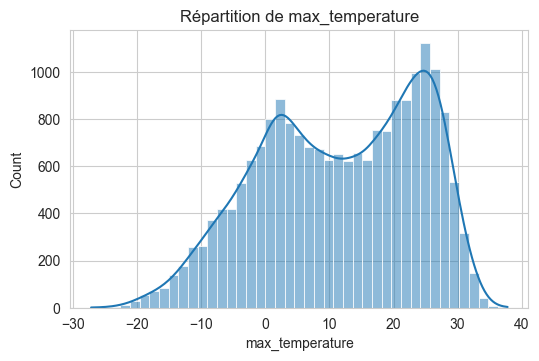

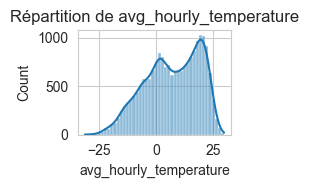

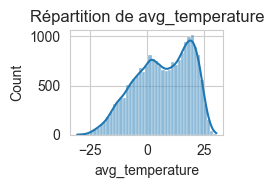

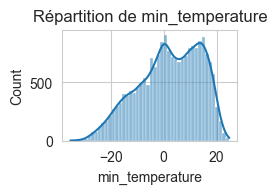

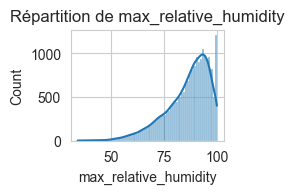

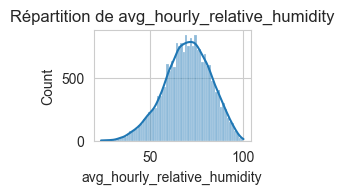

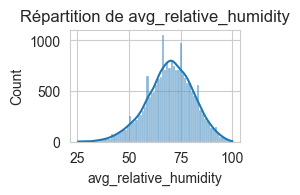

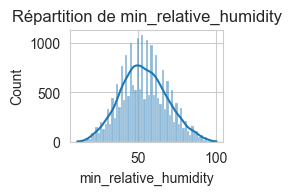

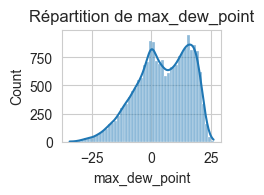

ValueError: num must be an integer with 1 <= num <= 9, not 10

<Figure size 640x480 with 0 Axes>

In [66]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow'],1):
    plt.subplot(3,3,i)
    sns.histplot(base_donnees[column],kde=True)
    plt.title(f"Répartition de {column}")

    plt.tight_layout()
    plt.show()
